In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nbimporter
from preprocessamento import gerar_target
from preprocessamento import preprocessar
from sklearn.tree import  export_graphviz

Importing Jupyter notebook from preprocessamento.ipynb


### Carregamento dos dados, e preprocessamento

In [2]:
data_2016 = pd.read_csv('respostas_2016.csv')

In [3]:
dados_2016 = preprocessar(data_2016)

In [4]:
target = gerar_target(data_2016)

In [5]:
dados_2016.shape

(237, 21)

In [6]:
cont = 0
for coluna in dados_2016.columns:
    print("{} - {}".format(cont, coluna))
    cont += 1

0 - Sexo
1 - filhos
2 - renda
3 - distancia_ufc_casa
4 - apresenta_necessidade_educacional_especial
5 - atividade_remunerada
6 - afinidade_linguagens
7 - afinidade_humanas
8 - afinidade_matematica
9 - afinidade_natureza
10 - estudo_fora_sala
11 - motivacao_curso
12 - tarefa_durante_curso
13 - dedicacao_exigida
14 - disciplinas_ofertadas
15 - competencias_habilidades_requiridas
16 - condicoes_mercado_trabalho
17 - competencias_area_ti
18 - realizacao_profissional
19 - concluir_curso_nessa_instituicao
20 - nao_mudaria_de_curso


### Gerando Feature Importace com Extra Tree Classifier

In [19]:
from sklearn.ensemble import ExtraTreesClassifier

In [20]:
forest = ExtraTreesClassifier()

In [13]:
import os

In [14]:
os.system('dot -Tpng tree.dot -o tree.png')

0

In [32]:
forest.fit(dados_2016, target)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [33]:
importances_clf = forest.feature_importances_

In [34]:
std_clf = np.std([forest.feature_importances_ for tree in forest.estimators_],axis=0)

In [35]:
indices_clf = np.argsort(importances_clf)[::-1]

Feature ranking:
1. feature 20 (0.062846)
2. feature 10 (0.060748)
3. feature 13 (0.059157)
4. feature 6 (0.059131)
5. feature 15 (0.057546)
6. feature 16 (0.057420)
7. feature 9 (0.057041)
8. feature 14 (0.057021)
9. feature 7 (0.055402)
10. feature 2 (0.055174)
11. feature 12 (0.054015)
12. feature 8 (0.051990)
13. feature 18 (0.051520)
14. feature 3 (0.050706)
15. feature 17 (0.050428)
16. feature 19 (0.046921)
17. feature 11 (0.040724)
18. feature 0 (0.033053)
19. feature 5 (0.021959)
20. feature 4 (0.009063)
21. feature 1 (0.008134)


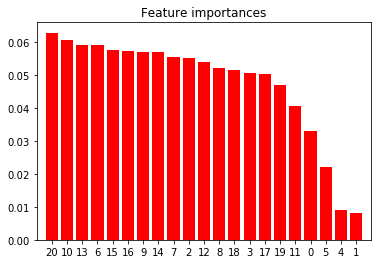

'\nprint("Feature ranking:")\n\nfor f in range(dados_2016.shape[1]):\n    print("%d. feature %d (%f)" % (f + 1, indices_clf[f], importances_clf[indices_clf[f]]))\n\nplt.figure()\nplt.title("Feature importances")\nplt.bar(range(dados_2016.shape[1]), importances_clf[indices_clf],\n       color="r", yerr=std_clf[indices_clf], align="center")\nplt.xticks(range(dados_2016.shape[1]), indices_clf)\nplt.xlim([-1, dados_2016.shape[1]])\nplt.show()\n'

In [36]:
print("Feature ranking:")

for f in range(dados_2016.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_clf[f], importances_clf[indices_clf[f]]))
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(dados_2016.shape[1]), importances_clf[indices_clf],
       color="r", yerr=std_clf[indices_clf], align="center")
plt.xticks(range(dados_2016.shape[1]), indices_clf)
plt.xlim([-1, dados_2016.shape[1]])
plt.show()
"""
print("Feature ranking:")

for f in range(dados_2016.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_clf[f], importances_clf[indices_clf[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(dados_2016.shape[1]), importances_clf[indices_clf],
       color="r", yerr=std_clf[indices_clf], align="center")
plt.xticks(range(dados_2016.shape[1]), indices_clf)
plt.xlim([-1, dados_2016.shape[1]])
plt.show()
"""

In [30]:
export_graphviz(forest.estimators_[0], feature_names=dados_2016.columns, filled=True, rounded=True, max_depth=3, class_names=['evadido', 'ativo'])

/home/igor/miniconda3/lib/python3.6/site-packages/sklearn/tree/export.py:386: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


### Gerando Feature Importace com RamdomForest

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
clf = RandomForestClassifier(max_depth=10, random_state=0)

In [9]:
clf.fit(dados_2016, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [10]:
importances_rf = clf.feature_importances_

In [37]:
std_rf = np.std([clf.feature_importances_ for tree in clf.estimators_],axis=0)

In [38]:
indices_rf = np.argsort(importances_rf)[::-1]

Feature ranking:
1. feature 10 (0.066436)
2. feature 2 (0.064857)
3. feature 14 (0.064474)
4. feature 20 (0.063334)
5. feature 13 (0.061512)
6. feature 8 (0.059438)
7. feature 9 (0.058572)
8. feature 17 (0.055912)
9. feature 18 (0.055096)
10. feature 16 (0.054997)
11. feature 6 (0.052795)
12. feature 12 (0.052614)
13. feature 3 (0.050642)
14. feature 19 (0.049622)
15. feature 11 (0.047262)
16. feature 7 (0.043457)
17. feature 15 (0.032895)
18. feature 0 (0.028441)
19. feature 5 (0.016960)
20. feature 4 (0.010898)
21. feature 1 (0.009786)


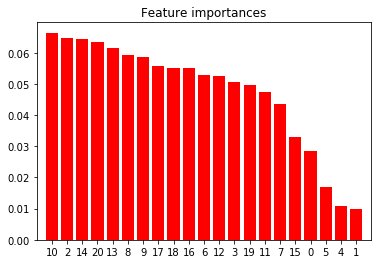

In [39]:
print("Feature ranking:")

for f in range(dados_2016.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_rf[f], importances_rf[indices_rf[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(dados_2016.shape[1]), importances_rf[indices_rf],
       color="r", yerr=std_rf[indices_rf], align="center")
plt.xticks(range(dados_2016.shape[1]), indices_rf)
plt.xlim([-1, dados_2016.shape[1]])
plt.show()

### Gerando Feature Importace com RandomTreesEmbedding

In [21]:
from sklearn.ensemble import RandomTreesEmbedding

In [22]:
rte = RandomForestClassifier(n_estimators=10, random_state=0, max_depth=3)

In [23]:
rte.fit(dados_2016, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [24]:
importances = rte.feature_importances_

In [25]:
std = np.std([rte.feature_importances_ for tree in rte.estimators_],axis=0)

In [24]:
print(std)

[ 0.00816183  0.00509912  0.00899947  0.01049288  0.00229134  0.00919039
  0.00960228  0.00939415  0.00901556  0.00542852  0.00790689  0.00338577
  0.00865174  0.0093568   0.01464751  0.01220147  0.0107753   0.0129564
  0.01457942  0.01465706  0.0141351 ]


In [26]:
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 16 (0.061777)
2. feature 14 (0.061055)
3. feature 9 (0.058644)
4. feature 10 (0.057452)
5. feature 13 (0.057101)
6. feature 8 (0.056885)
7. feature 2 (0.055372)
8. feature 7 (0.055361)
9. feature 20 (0.055091)
10. feature 18 (0.053435)
11. feature 17 (0.052797)
12. feature 11 (0.052499)
13. feature 19 (0.052187)
14. feature 15 (0.051580)
15. feature 6 (0.050972)
16. feature 3 (0.048533)
17. feature 12 (0.045640)
18. feature 0 (0.035864)
19. feature 5 (0.020547)
20. feature 4 (0.010436)
21. feature 1 (0.006772)


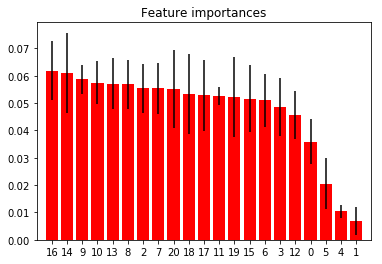

In [30]:
print("Feature ranking:")

for f in range(dados_2016.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(dados_2016.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(dados_2016.shape[1]), indices)
plt.xlim([-1, dados_2016.shape[1]])
plt.show()